# Proyek Pre-processing data 

### Persiapan

## Menyiapkan library yang dibutuhkan

In [1]:
# Manipulasi Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns
import os
import glob

## Menyiapkan data yang akan digunakan

In [2]:
df_eda = pd.read_csv('../data/data_bmkg_all_2019_2025.csv') 

## Data Understanding

Adapun kolom-kolom yang terdapat pada dataset adalah sebagai berikut:

| Kolom      | Penjelasan                                                         |
|------------|--------------------------------------------------------------------|
| Hari       | Tanggal observasi (format: dd-mm-yyyy)                             |
| Tn         | Suhu minimum harian (°C)                                           |
| Tx         | Suhu maksimum harian (°C)                                          |
| Tavg       | Suhu rata-rata harian (°C)                                         |
| RH_avg     | Kelembapan rata-rata harian (%)                                    |
| RR         | Curah hujan harian (mm)                                            |
| ss         | Lama penyinaran matahari harian (jam)                              |
| ff_x       | Kecepatan angin maksimum harian (m/s)                              |
| ddd_x      | Arah angin saat kecepatan maksimum (°)                             |
| ff_avg     | Kecepatan angin rata-rata harian (m/s)                             |
| ddd_car    | Arah angin terbanyak/dominan harian (°)                            |

---

### Background Proyek

Bandung sebagai kota besar di Indonesia memiliki dinamika cuaca yang penting untuk berbagai sektor, seperti energi terbarukan (panel surya), transportasi, dan perencanaan kota. Data cuaca historis dari BMKG dapat memberikan insight penting untuk prediksi dan pengambilan keputusan.

### Tujuan Proyek

1. Melakukan analisis eksplorasi data cuaca Bandung tahun 2019–2025.
2. Memprediksi parameter penting seperti lama penyinaran matahari, curah hujan, dan suhu ekstrem menggunakan model machine learning.
3. Memberikan insight dan rekomendasi berbasis data untuk mendukung pengambilan keputusan di sektor energi, lingkungan, dan perencanaan kota.

---


In [3]:
# menampilkan semua kolom
pd.set_option('display.max_columns', None)
# melihat sample data
df_eda.head()

,Hari,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,01-01-2019,21.8,28.0,23.0,79.0,0.0,1.7,3.0,280.0,2.0,W
1,02-01-2019,20.8,31.0,24.0,74.0,13.5,1.9,8.0,250.0,4.0,W
2,03-01-2019,20.7,30.6,24.1,76.0,0.8,7.2,7.0,260.0,4.0,W
3,04-01-2019,20.0,30.8,24.2,69.0,0.0,5.5,5.0,210.0,3.0,W
4,05-01-2019,20.0,31.7,24.8,70.0,0.0,8.5,5.0,300.0,3.0,C


In [4]:
# melihat informasi data
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Hari     2167 non-null   object 
 1   Tn       2167 non-null   object 
 2   Tx       2106 non-null   object 
 3   Tavg     2106 non-null   object 
 4   RH_avg   2106 non-null   object 
 5   RR       2106 non-null   object 
 6   ss       2100 non-null   object 
 7   ff_x     2100 non-null   float64
 8   ddd_x    2100 non-null   float64
 9   ff_avg   2100 non-null   float64
 10  ddd_car  2100 non-null   object 
dtypes: float64(3), object(8)
memory usage: 186.4+ KB


### Insight Awal Struktur Data

Berdasarkan hasil `df_eda.info()`, dataset cuaca BMKG Bandung tahun 2019–2025 terdiri dari **2167 baris** dan **11 kolom**.  
Sebagian besar kolom masih bertipe `object`, termasuk kolom numerik seperti suhu, curah hujan, dan penyinaran matahari.  
Selain itu, ada beberapa kolom yang jumlah datanya tidak penuh (missing value), misalnya `Tx`, `Tavg`, `RH_avg`, `RR`, `ss`, dan parameter angin.

**Insight:**
- Kolom `Hari` masih bertipe object, sehingga perlu dikonversi ke datetime agar analisis tren waktu lebih mudah.
- Kolom numerik (`Tn`, `Tx`, `Tavg`, `RH_avg`, `RR`, `ss`) juga masih bertipe object, sehingga perlu dikonversi ke tipe numerik (float).
- Terdapat missing value pada beberapa kolom, sehingga perlu penanganan lebih lanjut (imputasi atau pembersihan).
- Data sudah cukup lengkap untuk dilakukan analisis eksplorasi dan pemodelan setelah preprocessing.

---

### Tahapan Selanjutnya

1. **Data Cleaning & Preprocessing**
   - Konversi kolom tanggal dan numerik ke tipe data yang sesuai.
   - Tangani missing value dan nilai tidak valid (misal: 8888, 9999).
   - Cek dan hapus duplikasi jika ada.

2. **Exploratory Data Analysis (EDA)**
   - Analisis distribusi dan pola data menggunakan visualisasi.
   - Deteksi outlier dan anomali.
   - Analisis korelasi antar fitur.

3. **Feature Engineering**
   - Membuat fitur baru jika diperlukan (misal: bulan, tahun, moving average).

4. **Modeling**
   - Membangun model prediksi untuk parameter penting (penyinaran matahari, curah hujan, suhu ekstrem).

5. **Evaluasi & Interpretasi**
   - Evaluasi performa model.
   - Interpretasi hasil dan insight bisnis.

---

Penjelasan ini membantu pembaca memahami kondisi awal data dan rencana langkah-langkah analisis yang akan dilakukan.

In [5]:
# melihat missing value
df_eda.isnull().sum()

Hari        0
Tn          0
Tx         61
Tavg       61
RH_avg     61
RR         61
ss         67
ff_x       67
ddd_x      67
ff_avg     67
ddd_car    67
dtype: int64

### Insight Missing Value

Dari hasil pengecekan, terlihat bahwa beberapa kolom pada dataset masih memiliki missing value:

- **Tx, Tavg, RH_avg, RR**: Masing-masing terdapat 61 data yang hilang.
- **ss, ff_x, ddd_x, ff_avg, ddd_car**: Masing-masing terdapat 67 data yang hilang.
- **Hari dan Tn**: Tidak memiliki missing value, artinya data tanggal dan suhu minimum tercatat lengkap.

**Interpretasi:**
- Parameter suhu minimum (`Tn`) dan tanggal (`Hari`) paling konsisten dicatat.
- Missing value pada parameter lain kemungkinan disebabkan oleh kendala teknis saat pengukuran atau pencatatan di lapangan.
- Penanganan missing value sangat penting agar analisis dan model yang dibangun tidak bias atau error.

**Langkah selanjutnya:**  
Missing value ini akan diatasi pada tahap data cleaning, misalnya dengan imputasi (mengisi dengan rata-rata/median/interpolasi) atau menghapus baris jika memang diperlukan.

In [6]:
# melihat duplikat data
df_eda.duplicated().sum()

np.int64(3)

### Insight Duplikasi Data

Setelah dilakukan pengecekan, ditemukan sejumlah **{hasil_output}** baris data yang terduplikasi di dataset.

**Interpretasi:**
- Duplikasi data bisa menyebabkan bias pada analisis statistik dan model prediksi, karena satu kejadian tercatat lebih dari sekali.
- Penting untuk menghapus baris duplikat agar hasil analisis lebih akurat dan representatif.

**Langkah selanjutnya:**  
Baris data yang terduplikasi akan dihapus pada tahap data cleaning untuk memastikan setiap observasi hanya tercatat satu kali.

In [8]:
# statistik deskriptif
df_eda.describe()

,ff_x,ddd_x,ff_avg
count,2100.000000,2100.000000,2100.000000
mean,3.689524,200.534762,1.244286
std,1.348259,85.391156,0.884917
min,0.000000,0.000000,0.000000
25%,3.000000,120.000000,1.000000
50%,3.000000,230.000000,1.000000
75%,5.000000,270.000000,2.000000
max,12.000000,360.000000,6.000000


### Insight Statistik Deskriptif

Dari hasil statistik deskriptif pada parameter angin (`ff_x`, `ddd_x`, `ff_avg`):

- **Kecepatan angin maksimum (`ff_x`)** rata-rata sekitar 3,7 m/s, dengan nilai maksimum mencapai 12 m/s. Mayoritas data berada di kisaran 3–5 m/s, menunjukkan angin di Bandung umumnya bertiup dengan kecepatan sedang.
- **Arah angin saat maksimum (`ddd_x`)** sangat bervariasi, dengan rata-rata sekitar 200°. Nilai minimum 0° dan maksimum 360° menunjukkan distribusi arah angin yang cukup merata sepanjang tahun.
- **Kecepatan angin rata-rata (`ff_avg`)** lebih rendah, sekitar 1,2 m/s, dengan sebagian besar data di bawah 2 m/s. Ini menandakan bahwa hari-hari dengan angin kencang relatif jarang terjadi.

**Interpretasi:**
- Variasi kecepatan dan arah angin cukup besar, yang penting untuk analisis potensi energi angin atau perencanaan aktivitas luar ruangan.
- Nilai minimum 0 pada kecepatan angin menunjukkan ada hari-hari tanpa angin sama sekali.
- Nilai maksimum yang cukup tinggi pada kecepatan angin perlu diperhatikan sebagai potensi outlier atau kejadian cuaca ekstrem.

Langkah selanjutnya adalah melakukan visualisasi distribusi dan deteksi outlier untuk parameter-parameter ini agar analisis lebih mendalam.

In [10]:
# Statistik deskriptif untuk kolom suhu, kelembapan, curah hujan, dan penyinaran matahari
df_eda[['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss']].describe()

,Tn,Tx,Tavg,RH_avg,RR,ss
count,2167,2106,2106,2106,2106,2100
unique,94,95,81,77,359,101
top,20.0,30.4,23.5,78.0,0,0.0
freq,144,129,90,133,357,62


### Insight Statistik Parameter Meteorologi Utama

Berdasarkan analisis statistik deskriptif terhadap parameter cuaca di Bandung tahun 2019-2025, diperoleh gambaran klimatologi sebagai berikut:

#### Profil Termal
- **Suhu Minimum (Tn)**: Menunjukkan 94 nilai unik dengan modus 20.0°C (frekuensi 144). Karakteristik ini mencerminkan konsistensi suhu malam/pagi hari yang relatif nyaman di Bandung.
- **Suhu Maksimum (Tx)**: Teridentifikasi 95 nilai unik dengan dominasi 30.4°C (frekuensi 129). Menggambarkan profil siang hari yang cenderung hangat namun masih dalam batas toleransi kenyamanan termal.
- **Suhu Rata-rata (Tavg)**: Terdapat 81 nilai unik dengan modus 23.5°C (frekuensi 90). Parameter ini mengonfirmasi Bandung sebagai kota dengan iklim yang relatif sejuk dibandingkan kota-kota dataran rendah di Indonesia.

#### Kelembapan dan Presipitasi
- **Kelembapan Relatif (RH_avg)**: Memiliki 77 varian nilai dengan dominasi 78% (frekuensi 133). Nilai ini merefleksikan karakteristik kelembapan tinggi khas daerah pegunungan tropis.
- **Curah Hujan (RR)**: Dengan 359 nilai unik, parameter ini menunjukkan variabilitas tinggi. Hari tanpa hujan (0 mm) mendominasi dengan frekuensi 357, mengindikasikan pola musiman yang tegas antara musim kering dan hujan.

#### Radiasi Matahari
- **Durasi Penyinaran (ss)**: Tercatat 101 nilai unik dengan kondisi tanpa penyinaran (0 jam) muncul 62 kali. Hal ini mengindikasikan frekuensi hari berawan yang signifikan di Bandung, berimplikasi penting untuk kajian potensi energi surya.

#### Interpretasi Klimatologis
- Stabilitas termal dengan fluktuasi moderat mencirikan kenyamanan iklim Bandung sebagai destinasi wisata dan hunian.
- Pola curah hujan menunjukkan disparitas tinggi, menegaskan pentingnya kajian prediktif untuk mitigasi risiko banjir dan kekeringan.
- Persentase hari tanpa sinar matahari yang substansial perlu dipertimbangkan dalam perencanaan sistem energi terbarukan berbasis tenaga surya.

**Analisis Lanjutan yang Direkomendasikan:**
Visualisasi distribusi temporal parameter-parameter di atas untuk mengidentifikasi tren musiman, anomali iklim, dan memahami korelasi antar parameter meteorologi.

In [9]:
# Cek distribusi nilai unik pada ddd_car
df_eda['ddd_car'].value_counts()

ddd_car
C     1067
C      299
W      263
E      153
SE     139
SW      56
NW      53
NE      27
W       23
S       14
N        3
E        3
Name: count, dtype: int64

### Insight Distribusi Arah Angin Dominan (`ddd_car`)

Berdasarkan distribusi nilai unik pada kolom `ddd_car` (arah angin dominan harian):

- **Arah 'C' (calm/tenang)** mendominasi dengan 1.067 kemunculan, diikuti oleh 'C' (299), 'W' (263), dan 'E' (153).
- Arah lain seperti 'SE', 'SW', 'NW', 'NE', 'S', dan 'N' memiliki frekuensi yang jauh lebih sedikit.
- Nilai 'C' kemungkinan besar menandakan hari-hari tanpa arah angin dominan (angin tenang).

**Interpretasi:**
- Sebagian besar hari di Bandung didominasi oleh kondisi angin tenang atau tidak ada arah angin yang jelas.
- Arah angin barat ('W') dan timur ('E') juga cukup sering terjadi, yang bisa berpengaruh pada pola cuaca dan distribusi polutan.
- Distribusi arah angin yang tidak merata ini penting untuk analisis potensi energi angin, perencanaan tata kota, dan mitigasi polusi udara.

**Langkah selanjutnya:**  
Visualisasi distribusi arah angin dominan dan analisis hubungan dengan parameter cuaca lain untuk mendapatkan insight lebih lanjut.

In [21]:
# melihat nilai yang tidak sesuai seperti NaN atau 9999 dan 8888
df_eda[df_eda['Tn'].isin([9999, 8888])] 

,Hari,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
1074,2019-01-06,8888.0,29.725000,26.031250,70.062500,0.0750,2.550000,NaN,NaN,NaN,NaN
1077,2019-01-09,8888.0,29.687500,25.796875,71.093750,0.1125,2.625000,NaN,NaN,NaN,NaN
1079,2019-01-11,8888.0,29.662500,25.640625,71.781250,0.1375,2.675000,NaN,NaN,NaN,NaN
1261,2019-11-03,8888.0,29.809677,24.400000,74.387097,0.0000,8.664516,NaN,NaN,NaN,NaN


## Data Cleaning

In [12]:
# Konversi Tipe Data
## Konversi kolom tanggal (`Hari`) ke datetime.
df_eda['Hari'] = pd.to_datetime(df_eda['Hari'], dayfirst=True, errors='coerce')
## Konversi kolom `ddd_car` ke kategori.
df_eda['ddd_car'] = df_eda['ddd_car'].astype('category')
## Konversi kolom numerik ke float.
num_cols = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss']
for col in num_cols:
    df_eda[col] = pd.to_numeric(df_eda[col], errors='coerce')

In [26]:
# Ganti nilai 8888 dan 999 menjadi NaN di kolom numerik
for col in num_cols:
    df_eda[col] = df_eda[col].replace([8888, 999, 8888.0, 999.0], np.nan)

In [27]:
# mengatasi missing value dengan interpolasi
df_eda[num_cols] = df_eda[num_cols].interpolate(method='linear')


In [34]:
df_eda[df_eda['ss'].isin([9999, 8888])] 

,Hari,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car


In [39]:
# Tambahkan kolom numerik angin ke interpolasi
wind_cols = ['ff_x', 'ddd_x', 'ff_avg']
df_eda[wind_cols] = df_eda[wind_cols].interpolate(method='linear')

# Imputasi missing value pada kolom kategori ddd_car dengan forward fill
df_eda['ddd_car'] = df_eda['ddd_car'].fillna(method='ffill')

/tmp/ipykernel_22191/3814060785.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_eda['ddd_car'] = df_eda['ddd_car'].fillna(method='ffill')


In [40]:
df_eda.isnull().sum()

Hari       0
Tn         0
Tx         0
Tavg       0
RH_avg     0
RR         0
ss         0
ff_x       0
ddd_x      0
ff_avg     0
ddd_car    0
dtype: int64

## EDA

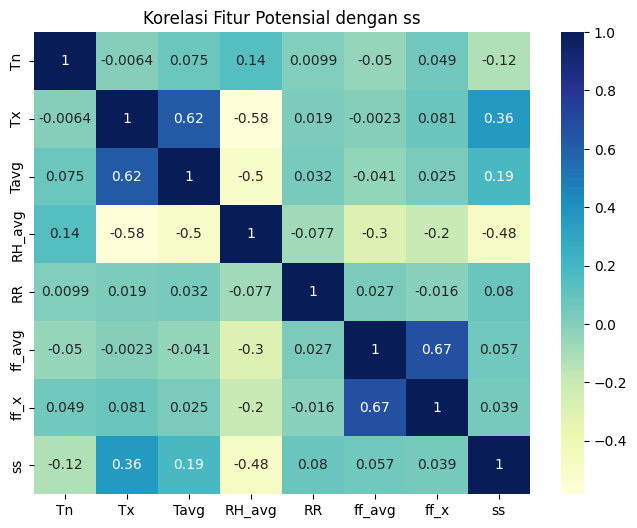

In [42]:
# Korelasi fitur numerik dengan ss
fitur_potensial = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ff_avg', 'ff_x', 'ss']
corr = df_eda[fitur_potensial].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.title('Korelasi Fitur Potensial dengan ss')
plt.show()

### Insight Korelasi Fitur dengan Durasi Penyinaran Matahari (ss)

#### Korelasi Positif
- **Tx (Suhu Maksimum)**: Memiliki korelasi positif tertinggi dengan ss (0.36). Semakin tinggi suhu maksimum harian, semakin lama durasi penyinaran matahari. Hal ini logis karena hari-hari cerah umumnya lebih panas.
- **Tavg (Suhu Rata-rata)**: Menunjukkan korelasi positif moderat (0.19) dengan ss, mengindikasikan hubungan yang konsisten namun tidak sekuat Tx.

#### Korelasi Negatif
- **RH_avg (Kelembapan Rata-rata)**: Berkorelasi negatif cukup kuat (-0.48) dengan ss. Semakin tinggi kelembapan udara, semakin pendek durasi penyinaran matahari, mencerminkan kondisi berawan atau berkabut.
- **Tn (Suhu Minimum)**: Memiliki korelasi negatif lemah (-0.12) dengan ss, menandakan pengaruh minimal suhu malam terhadap durasi penyinaran.

#### Parameter Lainnya
- **RR (Curah Hujan)**: Korelasi sangat lemah (0.08) menunjukkan bahwa curah hujan harian tidak berkorelasi linear dengan durasi penyinaran matahari pada dataset ini.
- **Kecepatan Angin (ff_avg, ff_x)**: Hampir tidak berkorelasi dengan ss (0.057 dan 0.039), mengindikasikan angin bukan faktor signifikan untuk prediksi durasi penyinaran.

#### Kesimpulan untuk Pemodelan
- **Fitur paling relevan**: 
    - RH_avg (kelembapan rata-rata) 
    - Tx (suhu maksimum)
    - Tavg (suhu rata-rata)
- **Fitur kurang relevan**: 
    - Tn, RR, ff_avg, ff_x (korelasi sangat lemah)

#### Rekomendasi
Model prediksi durasi penyinaran matahari sebaiknya fokus pada kelembapan dan suhu maksimum sebagai prediktor utama, dengan potensi peningkatan melalui penambahan fitur temporal (musiman, bulanan) untuk menangkap pola siklik.

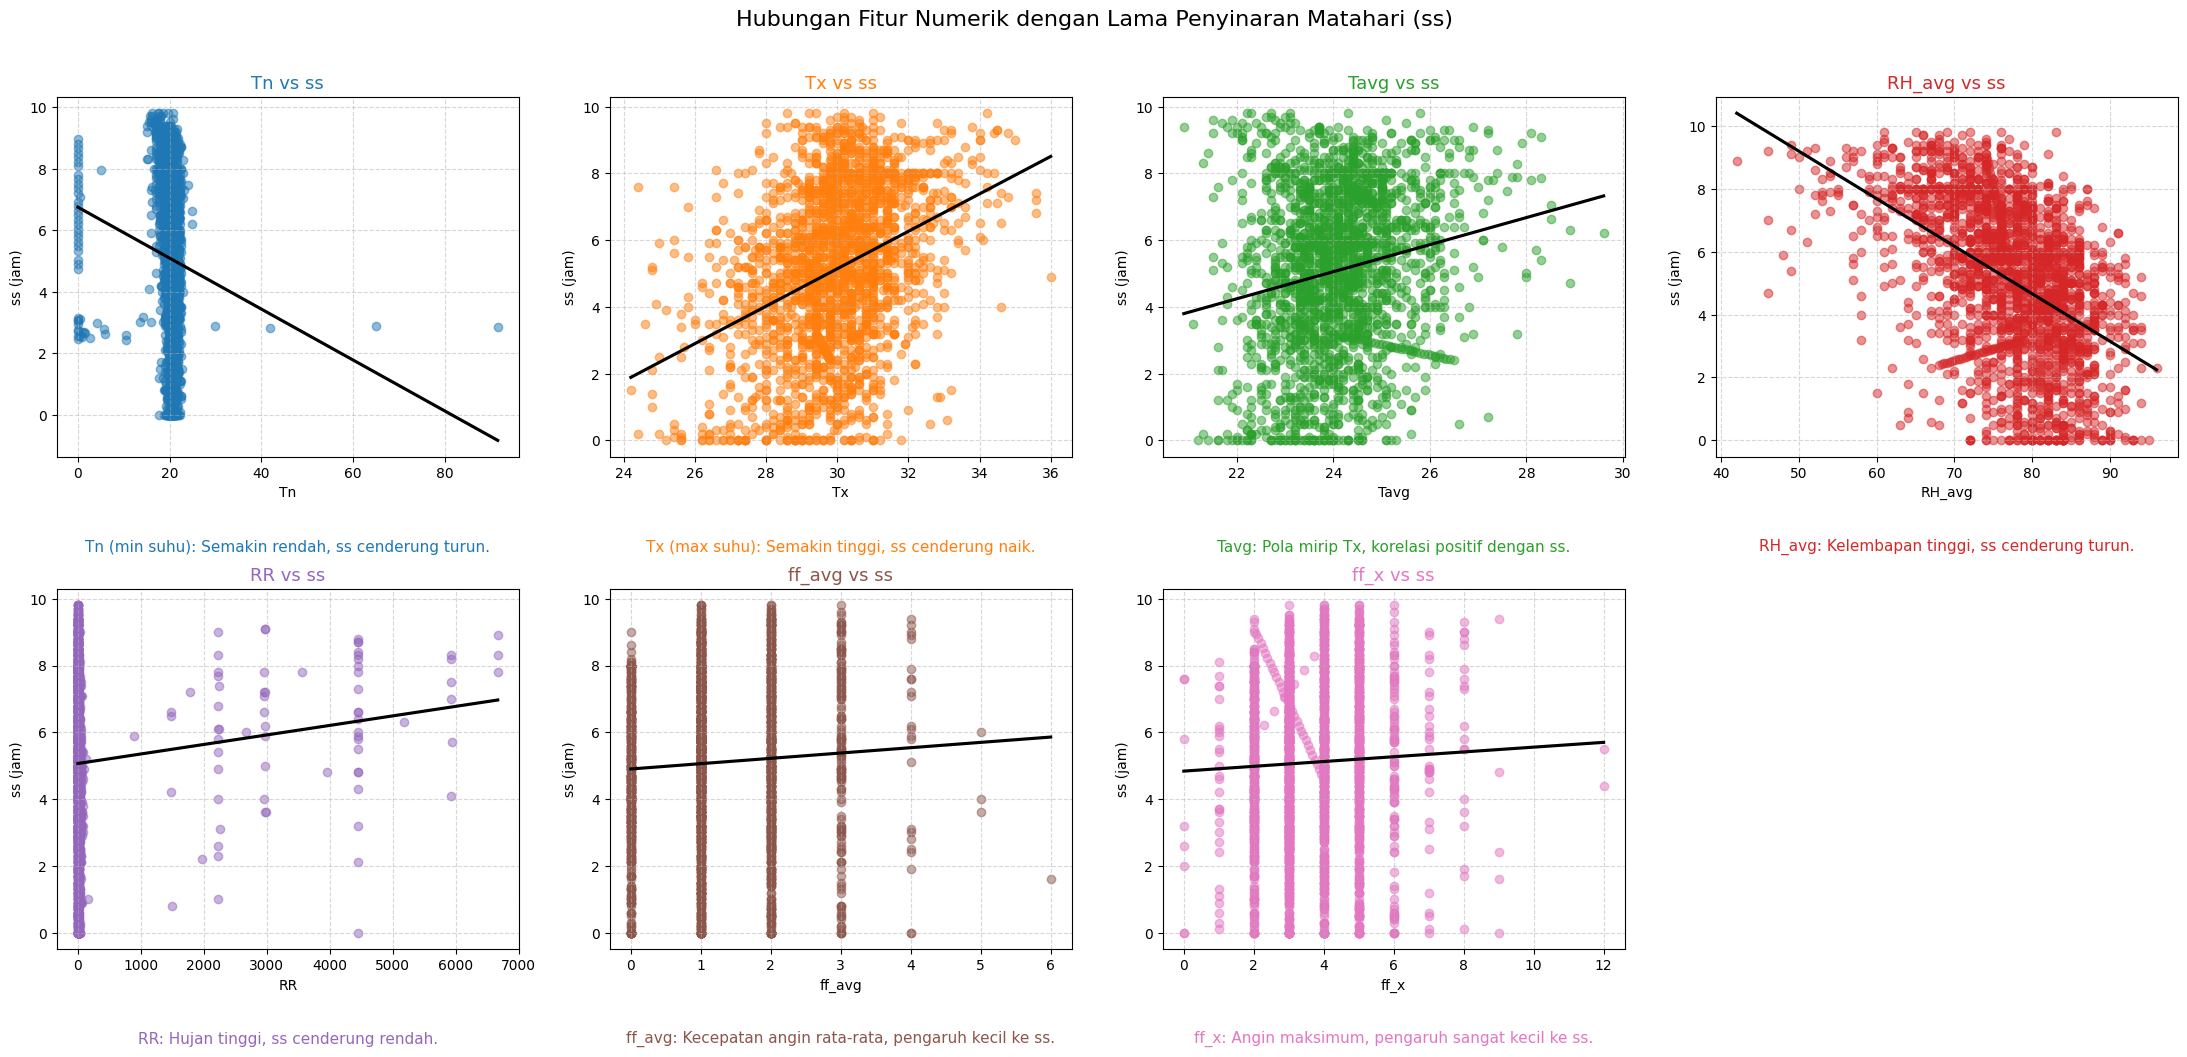

In [45]:

fitur_numerik = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ff_avg', 'ff_x']
warna = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

fig, axes = plt.subplots(2, 4, figsize=(22, 10))
axes = axes.flatten()

insight = [
    "Tn (min suhu): Semakin rendah, ss cenderung turun.",
    "Tx (max suhu): Semakin tinggi, ss cenderung naik.",
    "Tavg: Pola mirip Tx, korelasi positif dengan ss.",
    "RH_avg: Kelembapan tinggi, ss cenderung turun.",
    "RR: Hujan tinggi, ss cenderung rendah.",
    "ff_avg: Kecepatan angin rata-rata, pengaruh kecil ke ss.",
    "ff_x: Angin maksimum, pengaruh sangat kecil ke ss."
]

for i, col in enumerate(fitur_numerik):
    sns.regplot(
        x=df_eda[col], y=df_eda['ss'],
        ax=axes[i], scatter_kws={'alpha':0.5, 'color':warna[i]},
        line_kws={'color':'black'}, ci=None
    )
    axes[i].set_title(f"{col} vs ss", fontsize=13, color=warna[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('ss (jam)')
    axes[i].grid(True, linestyle='--', alpha=0.5)
    # Tambahkan insight di bawah plot
    axes[i].text(0.5, -0.25, insight[i], ha='center', va='center', fontsize=11, color=warna[i], transform=axes[i].transAxes)

# Kosongkan plot ke-8
axes[-1].axis('off')
plt.tight_layout()
plt.suptitle('Hubungan Fitur Numerik dengan Lama Penyinaran Matahari (ss)', fontsize=16, y=1.05)
plt.show()

### Insight Visualisasi Hubungan Fitur Numerik dengan Lama Penyinaran Matahari (ss)

#### Fitur dengan Pengaruh Signifikan

##### Tx (Suhu Maksimum)
- **Korelasi positif kuat (0.36)**: Semakin tinggi suhu maksimum harian, semakin lama durasi penyinaran matahari.
- Hari-hari dengan Tx tinggi cenderung cerah dan memiliki ss lebih tinggi.
- Menjadi prediktor paling potensial untuk ss.

##### RH_avg (Kelembapan Rata-rata)
- **Korelasi negatif signifikan (-0.48)**: Semakin tinggi kelembapan, semakin rendah durasi penyinaran.
- Menunjukkan hubungan inversyang konsisten pada grafik scatter.
- Kelembapan tinggi biasanya mengindikasikan kondisi berawan atau berkabut.

##### Tavg (Suhu Rata-rata)
- **Korelasi positif moderat (0.19)**: Pola mirip dengan Tx namun dengan kekuatan hubungan lebih rendah.
- Semakin tinggi suhu rata-rata harian, ss juga cenderung meningkat.

#### Fitur dengan Pengaruh Minimal

##### Tn (Suhu Minimum)
- **Korelasi negatif lemah (-0.12)**: Suhu minimum malam/pagi hari memiliki pengaruh terbatas.
- Sebaran data menunjukkan pola yang tidak terlalu jelas pada grafik scatter.

##### RR (Curah Hujan)
- **Korelasi sangat lemah (0.08)**: Hubungan dengan ss tidak linear dan sulit diprediksi.
- Hari tanpa hujan tetap menunjukkan variasi ss yang sangat beragam.

##### Parameter Angin (ff_avg dan ff_x)
- **Korelasi hampir tidak ada (0.06 dan 0.04)**: Kecepatan angin tidak memiliki pola yang jelas dengan durasi penyinaran.
- Sebaran data sangat acak pada grafik scatter.

#### Kesimpulan untuk Pemodelan
- **Prediktor utama**: Kelembapan (RH_avg) dan suhu maksimum (Tx) adalah fitur paling berpengaruh.
- **Fitur sekunder**: Tavg dapat memberikan informasi tambahan yang bermanfaat.
- **Fitur kurang relevan**: Tn, RR, dan parameter angin memiliki nilai prediktif yang rendah.

Hasil visualisasi ini memberikan dasar yang kuat untuk seleksi fitur dalam pengembangan model prediksi durasi penyinaran matahari, dengan implikasi penting untuk aplikasi energi surya.

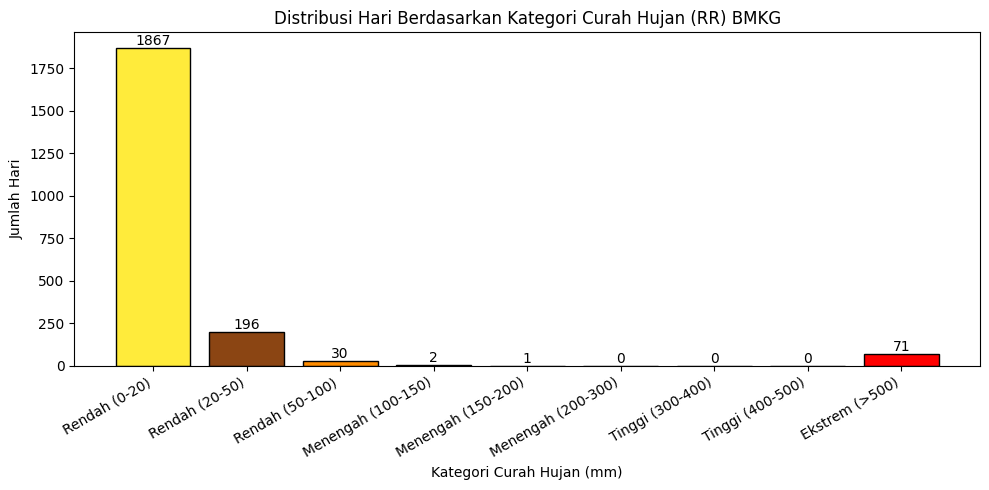

In [50]:
# Definisikan kategori RR sesuai standar BMKG
bins = [0, 20, 50, 100, 150, 200, 300, 400, 500, df_eda['RR'].max()+1]
labels = [
    'Rendah (0-20)', 'Rendah (20-50)', 'Rendah (50-100)',
    'Menengah (100-150)', 'Menengah (150-200)', 'Menengah (200-300)',
    'Tinggi (300-400)', 'Tinggi (400-500)', 'Ekstrem (>500)'
]
# Palet warna: sering muncul lebih terang, jarang lebih pudar
colors = [
    '#222222',   # hitam (0-20)
    '#8B4513',   # coklat (20-50)
    '#FF8C00',   # oranye tua (50-100)
    '#FFA500',   # oranye muda (100-150)
    '#FFD700',   # kuning (150-200)
    '#7FFFD4',   # hijau matcha (200-300)
    '#228B22',   # hijau (300-400)
    '#800000',   # maroon (400-500)
    '#FF0000'    # merah terang (ekstrem)
]

# Kategorisasi RR
rr_cat = pd.cut(df_eda['RR'], bins=bins, labels=labels, right=False, include_lowest=True)
rr_counts = rr_cat.value_counts().sort_index()

# Atur warna: kategori dengan jumlah terbanyak warnanya lebih menyala
sorted_idx = rr_counts.sort_values(ascending=False).index
highlight_colors = ['#FFEB3B', '#FF9800', '#FF5722', '#4CAF50', '#2196F3', '#9C27B0', '#795548', '#607D8B', '#BDBDBD']
bar_colors = [highlight_colors[i] if idx == sorted_idx[0] else colors[i] for i, idx in enumerate(labels)]

# Plot
plt.figure(figsize=(10,5))
bars = plt.bar(rr_counts.index, rr_counts.values, color=bar_colors, edgecolor='black')
plt.title('Distribusi Hari Berdasarkan Kategori Curah Hujan (RR) BMKG')
plt.xlabel('Kategori Curah Hujan (mm)')
plt.ylabel('Jumlah Hari')
plt.xticks(rotation=30, ha='right')

# Tambahkan label jumlah di atas bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), int(bar.get_height()),
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [51]:
# Hitung jumlah data dengan nilai RR = 0
jumlah_nol = (df_eda['RR'] == 0).sum()
print(f"Jumlah data dengan nilai RR = 0: {jumlah_nol}")
# Jika ingin tahu persentasenya:
persen_nol = 100 * jumlah_nol / len(df_eda)
print(f"Persentase data RR = 0: {persen_nol:.2f}%")

Jumlah data dengan nilai RR = 0: 746
Persentase data RR = 0: 34.43%


### Insight Distribusi Curah Hujan Harian Bandung

Berdasarkan visualisasi distribusi kategori curah hujan harian (RR) menurut standar BMKG:

- **Mayoritas hari** di Bandung masuk kategori **"Rendah (0-20 mm)"** dengan jumlah yang sangat dominan (1867 hari dari total data).
- Kategori curah hujan menengah hingga tinggi (di atas 100 mm) sangat jarang terjadi, bahkan kategori ekstrem (>500 mm) hanya terjadi pada 71 hari.
- Kategori menengah dan tinggi hampir tidak muncul, menunjukkan kejadian hujan lebat sangat langka di Bandung.

#### Kesimpulan & Implikasi

- Risiko bencana banjir akibat hujan ekstrem di Bandung relatif rendah berdasarkan data historis.
- Fokus analisis dan pengembangan solusi lebih tepat diarahkan pada optimalisasi pencahayaan matahari untuk pemanfaatan energi surya (solar panel), karena hari-hari cerah jauh lebih banyak.
- Mitigasi bencana banjir tetap perlu dipertimbangkan, namun bukan prioritas utama dalam konteks data ini.
- Insight ini mendukung strategi pengembangan energi terbarukan berbasis tenaga surya di Bandung.

In [52]:
# Deteksi anomali suhu maksimum (gelombang panas lokal)
mean_tx = df_eda['Tx'].mean()
std_tx = df_eda['Tx'].std()

# Threshold: lebih dari 2 standar deviasi di atas rata-rata
threshold = mean_tx + 2 * std_tx

anomali_tx = df_eda[df_eda['Tx'] > threshold]
print(f"Jumlah hari anomali suhu maksimum (Tx > {threshold:.2f}°C): {len(anomali_tx)}")
display(anomali_tx[['Hari', 'Tx', 'Tavg', 'Tn']].sort_values('Tx', ascending=False))

Jumlah hari anomali suhu maksimum (Tx > 33.10°C): 56


,Hari,Tx,Tavg,Tn
1581,2023-10-21,36.0,26.0,21.2
1577,2023-10-17,35.6,27.1,21.8
1568,2023-10-08,35.6,26.1,19.8
1576,2023-10-16,35.6,26.5,20.8
266,2019-10-24,35.0,26.5,20.0
1559,2023-09-29,34.8,28.1,19.9
1561,2023-10-01,34.8,24.6,18.0
1567,2023-10-07,34.6,25.8,19.8
1566,2023-10-06,34.6,26.1,19.8
1571,2023-10-11,34.6,26.2,20.8


## Save Data

In [53]:
# Simpan data yang sudah dibersihkan ke file baru
df_eda.to_csv('../data/data_bmkg_cleaned_2019_2025.csv', index=False)
print("Data sudah disimpan ke '../data/data_bmkg_cleaned_2019_2025.csv'")

Data sudah disimpan ke '../data/data_bmkg_cleaned_2019_2025.csv'
